<IPython.core.display.Javascript object>


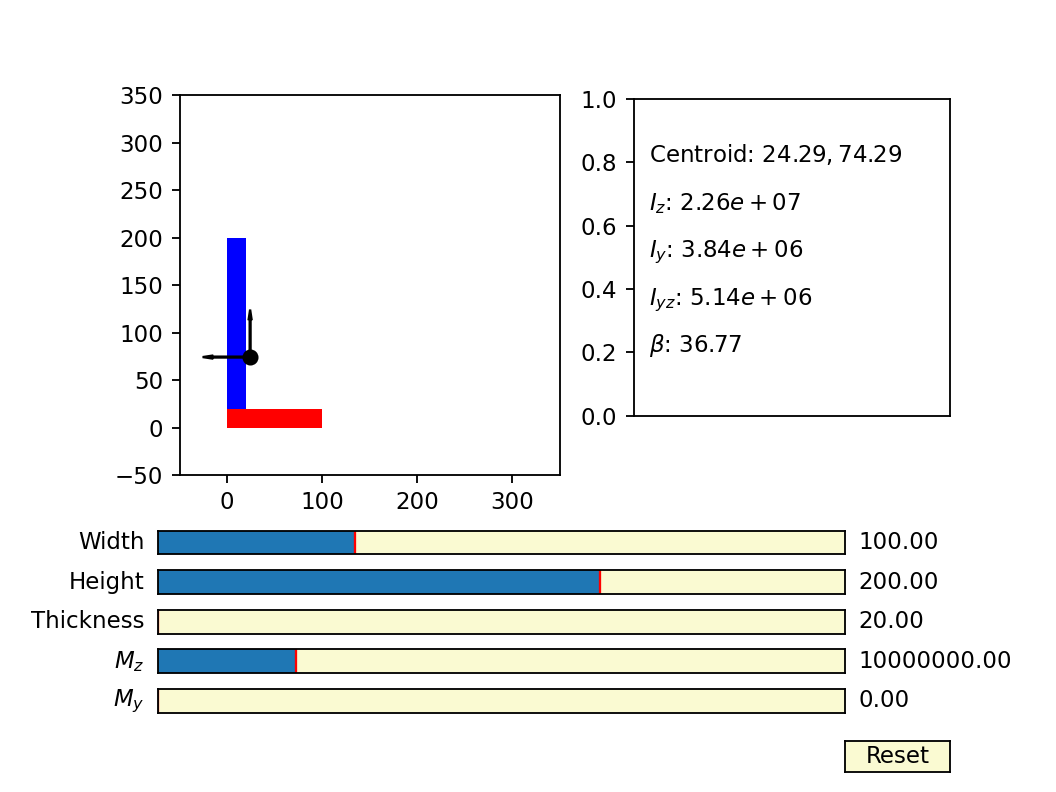

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.widgets import Slider, Button

fig, ax = plt.subplots()
plt.subplots_adjust(left=-0.2, bottom=0.40)
#t = np.arange(0.0, 1.0, 0.001)
w0 = 100
h0 = 200
t0 = 20
delta_width = 1.0
delta_height = 1.0
delta_thickness = 1.0
Mz0 = 10e6
My0 = 0

ax.margins(x=0)

bottom_point = 0
left_point = 0

rect1 = mpatches.Rectangle((left_point,bottom_point+t0),t0,h0-t0,fc='blue')
rect2 = mpatches.Rectangle((left_point,bottom_point),w0,t0,fc='red')
r1 = ax.add_patch(rect1)
r2 = ax.add_patch(rect2)
ax.set_xlim([-50, 350])
ax.set_ylim([-50, 350])
ax.set_aspect(1)

def rect_centroid(jrec):
    xdash = jrec.get_xy()[0]
    ydash = jrec.get_xy()[1]
    jrec_centroid_x = xdash + 0.5*jrec.get_width()
    jrec_centroid_y = ydash + 0.5*jrec.get_height()
    return (jrec_centroid_x, jrec_centroid_y)

def angle_centroid(jrec1,jrec2):
    w1 = jrec1.get_width()
    h1 = jrec1.get_height()
    w2 = jrec2.get_width()
    h2 = jrec2.get_height()
    A1 = w1*h1
    A2 = w2*h2
    angle_centroid_x = ( A1*(rect_centroid(jrec1)[0]) + A2*(rect_centroid(jrec2)[0]) )/(A1+A2)
    angle_centroid_y = ( A1*(rect_centroid(jrec1)[1]) + A2*(rect_centroid(jrec2)[1]) )/(A1+A2)
    return (angle_centroid_x, angle_centroid_y)

def rect_moments_of_area(jrec,new_origin):
    new_origin_x = new_origin[0]
    new_origin_y = new_origin[1]
    jw = jrec.get_width()
    jh = jrec.get_height()
    jrec_centroid_x = rect_centroid(jrec)[0]
    jrec_centroid_y = rect_centroid(jrec)[1]
    jrec_dist_zaxis = abs(jrec_centroid_y - new_origin_y)
    jrec_dist_yaxis = abs(jrec_centroid_x - new_origin_x)
    jrec_Iz = 1/12*jw*jh**3 + jw*jh*jrec_dist_zaxis**2
    jrec_Iy = 1/12*jw**3*jh + jw*jh*jrec_dist_yaxis**2
    jrec_Iyz = 0 + jw*jh*jrec_dist_zaxis*jrec_dist_yaxis
    
    return (jrec_Iz, jrec_Iy, jrec_Iyz)

def angle_moments_of_area(jrec1,jrec2):
    jangle_centroid = angle_centroid(jrec1,jrec2)
   
    jrec1_moments = rect_moments_of_area(jrec1,jangle_centroid)
    jrec2_moments = rect_moments_of_area(jrec2,jangle_centroid)
    
    return (tuple(map(lambda x,y: x+y,jrec1_moments,jrec2_moments)))


import numpy as np
def neutral_axis(jmoments_of_area,jM):
    (jIz,jIy,jIyz) = jmoments_of_area
    (jMz, jMy) = jM
    return np.arctan( (jMz*jIy + jMy*jIyz)/(jMz*jIyz + jMy*jIz) )*180/np.pi

(Iz, Iy, Iyz) = angle_moments_of_area(rect1,rect2)

beta = neutral_axis((Iz,Iy,Iyz),(Mz0,My0))


#display(angle_centroid(rect1,rect2))
centroid_coords_z = left_point + angle_centroid(rect1,rect2)[0]
centroid_coords_y = bottom_point + angle_centroid(rect1,rect2)[1]
    
p, = ax.plot(centroid_coords_z,centroid_coords_y,'ko')

arrow1 = mpatches.Arrow(centroid_coords_z,centroid_coords_y,-50,0,width=5,color='black')
arrow2 = mpatches.Arrow(centroid_coords_z,centroid_coords_y,0,50,width=5,color='black')
global a1, a2
a1 = ax.add_patch(arrow1)
a2 = ax.add_patch(arrow2)
    

init_centroid_text = r'Centroid: $%.2f,%.2f$' % (centroid_coords_z, centroid_coords_y)
init_Iz_text = r'$I_z$: $%.2e$' % (Iz)
init_Iy_text = r'$I_y$: $%.2e$' % (Iy)
init_Iyz_text = r'$I_{yz}$: $%.2e$' % (Iyz)
init_beta_text = r'$\beta$: $%.2f$' % (beta)
#global axboxtext
axbox = plt.axes([0.6, 0.475, 0.3, 0.4])
axboxtext_c = axbox.text(0.05,0.8,init_centroid_text)
axboxtext_Iz = axbox.text(0.05, 0.65, init_Iz_text)
axboxtext_Iy = axbox.text(0.05, 0.5, init_Iy_text)
axboxtext_Iyz = axbox.text(0.05, 0.35, init_Iyz_text)
axboxtext_beta = axbox.text(0.05, 0.20, init_beta_text)

#axbox.set_xticks([],[])
#axbox.set_yticks([],[])
axbox.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False)

#draw_arrows()
    
axcolor = 'lightgoldenrodyellow'
axwidth = plt.axes([0.15, 0.30, 0.65, 0.03], facecolor=axcolor)
axheight = plt.axes([0.15, 0.25, 0.65, 0.03], facecolor=axcolor)
axthick = plt.axes([0.15, 0.20, 0.65, 0.03], facecolor=axcolor)
axMz = plt.axes([0.15, 0.15, 0.65, 0.03], facecolor=axcolor)
axMy = plt.axes([0.15, 0.10, 0.65, 0.03], facecolor=axcolor)

swidth = Slider(axwidth, 'Width', 20.0, 300.0, valinit=w0, valstep=delta_width)
sheight = Slider(axheight, 'Height', 20.0, 300.0, valinit=h0, valstep=delta_height)
sthick = Slider(axthick, 'Thickness', 20.0, 40.0, valinit=t0, valstep=delta_thickness)
sMz = Slider(axMz, r'$M_z$', 0e6, 50e6, valinit=Mz0)
sMy = Slider(axMy, r'$M_y$', 0e6, 50e6, valinit=My0)



def update(val):
    w = swidth.val
    h = sheight.val
    t = sthick.val
    Mz = sMz.val
    My = sMy.val
                
    r1.set_width(t)
    rect1.set_width(t)
    r1.set_height(h-t)
    rect1.set_height(h-t)
    r2.set_width(w)
    rect2.set_width(w)
    r2.set_height(t)
    rect2.set_height(t)
    
    centroid_coords_z = left_point + angle_centroid(rect1,rect2)[0]
    centroid_coords_y = bottom_point + angle_centroid(rect1,rect2)[1]
    p.set_xdata(centroid_coords_z)
    p.set_ydata(centroid_coords_y)
    #p = ax.plot(centroid_coords_z,centroid_coords_y,'ko')
    global a1, a2
    a1.remove()
    a2.remove()
    arrow1 = mpatches.Arrow(centroid_coords_z,centroid_coords_y,-50,0,width=5,color='black')
    arrow2 = mpatches.Arrow(centroid_coords_z,centroid_coords_y,0,50,width=5,color='black')
    a1 = ax.add_patch(arrow1)
    a2 = ax.add_patch(arrow2)

    
    #global axboxtext
    #axbox.text.remove()
    new_text_c = r'Centroid: $%.2f,%.2f$' % (centroid_coords_z, centroid_coords_y)
    axboxtext_c.set_text(new_text_c)

    (newIz, newIy, newIyz) = angle_moments_of_area(rect1,rect2)
    new_text_Iz = r'$I_z$: %.2e' %(newIz)
    new_text_Iy = r'$I_y$: %.2e' %(newIy)
    new_text_Iyz = r'$I_{yz}$: %.2e' %(newIyz)
    axboxtext_Iz.set_text(new_text_Iz)
    axboxtext_Iy.set_text(new_text_Iy)
    axboxtext_Iyz.set_text(new_text_Iyz)

    newbeta = neutral_axis((newIz,newIy,newIyz),(Mz,My))
    new_text_beta = r'$\beta$: $%.2f$' %(newbeta)
    axboxtext_beta.set_text(new_text_beta)

    fig.canvas.draw_idle()


swidth.on_changed(update)
sheight.on_changed(update)
sthick.on_changed(update)
sMz.on_changed(update)
sMy.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    swidth.reset()
    sheight.reset()
    sthick.reset()
    sMz.reset()
    sMy.reset()
button.on_clicked(reset)

#rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
#radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


#def colorfunc(label):
#    l.set_color(label)
#    fig.canvas.draw_idle()
#radio.on_clicked(colorfunc)

plt.show()
